### Načteme potřebné knihovny

In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from scipy.stats import truncnorm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
import statsmodels.formula.api as smf

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

In [495]:
#načítanie dát pre úlohu 1
df1 = pd.read_excel('Projekt-2_Data.xlsx', sheet_name="Úloha 1", nrows=100)
interval_per = 0.95

#apriorné parametre pre gamma distribúciu
pri_beta = 5
pri_alpha = 10

#aposteriorné parametre pre gamma distribúciu
pos_beta = pri_beta + len(df1['uloha_1 a)'])
pos_alpha = pri_alpha + df1['uloha_1 a)'].sum()

pos_alpha_beta = pos_alpha/pos_beta

#výpočet intervalu spoľahlivosti pre apriornú a aposteriornú distribúciu
low_pri, high_pri = stats.gamma.interval(interval_per, pri_alpha, scale=1/pri_beta)
low_pos, high_pos = stats.gamma.interval(interval_per, pos_alpha, scale=1/pos_beta)

#apriorná a aposteriorná gamma distribúcia
prior_distribution = stats.gamma(pri_alpha, scale=1/pri_beta)
posterior_distribution = stats.gamma(pos_alpha, scale=1/pos_beta)

#vierohodnostná funkcia
likelihood_func = lambda x, lambda_param: stats.poisson.pmf(x, lambda_param)

x_values = np.linspace(0, 10, 1000)

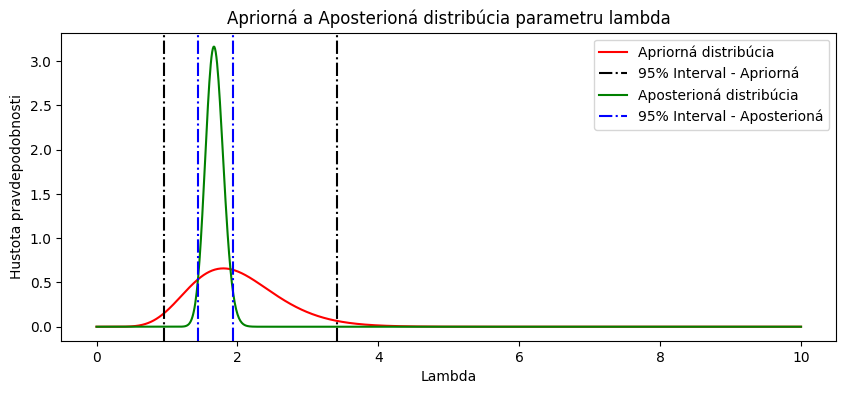

In [515]:
#1a).1 a 1a).3
#apriorná a aposterioná hustota prametru Poissonovho rozdelenia 𝜆
plt.figure(figsize=(10, 4))
plt.title('Apriorná a Aposterioná distribúcia parametru lambda')
plt.xlabel('Lambda')
plt.ylabel('Hustota pravdepodobnosti')

plt.plot(x_values, prior_distribution.pdf(x_values), label='Apriorná distribúcia', color='red')
plt.axvline(low_pri, linestyle='-.', color='black', label=f'{95}% Interval - Apriorná')
plt.axvline(high_pri, linestyle='-.', color='black')
plt.plot(x_values, posterior_distribution.pdf(x_values), label='Aposterioná distribúcia', color='green')
plt.axvline(low_pos, linestyle='-.', color='blue', label=f'{95}% Interval - Aposterioná')
plt.axvline(high_pos, linestyle='-.', color='blue')

plt.legend()
plt.show()

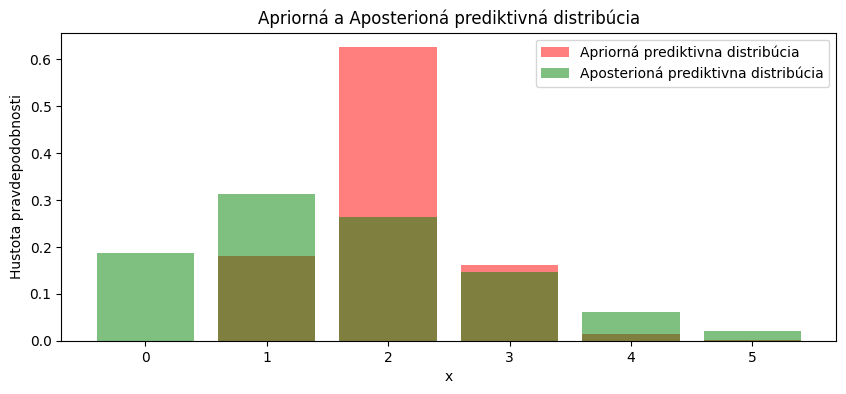

In [497]:
#1a).2
#apriorná a aposterioná prediktivna hustota pozorovania x za jeden časový interval
plt.figure(figsize=(10, 4))
plt.title('Apriorná a Aposterioná prediktivná distribúcia')
plt.xlabel('x')
plt.ylabel('Hustota pravdepodobnosti')

x = np.arange(0, max(df1['uloha_1 a)']) + 1)
plt.bar(x, prior_distribution.pdf(x), alpha=0.5, label='Apriorná prediktivna distribúcia', color='red')
plt.bar(x, likelihood_func(x, pos_alpha_beta), alpha=0.5, label='Aposterioná prediktivna distribúcia', color='green')

plt.legend()
plt.show()

In [498]:
#1a).4
#bodové odhady aposterioného parametra 𝜆
pos_median = (pos_alpha - 1/3) / pos_beta

print(f"Aposteriony bodový odhad: \nStredná hodnota: {pos_alpha_beta} \nMedián: {pos_median}")

Aposteriony bodový odhad: 
Stredná hodnota: 1.6761904761904762 
Medián: 1.6730158730158728


In [499]:
#1a).5
#bodové odhady počtu pozorovaní
pri_mean = pri_alpha / pri_beta

print(f"Apriorný a aposterioný bodový odhad počtu pozorovania: \nApriorná stredná hodnota: {pri_mean} \nAposterioná stredná hodnota: {pos_alpha_beta}")

Apriorný a aposterioný bodový odhad počtu pozorovania: 
Apriorná stredná hodnota: 2.0 
Aposterioná stredná hodnota: 1.6761904761904762


### b) Aproximace diskrétním rozdělením

In [500]:
"""
mean_value = 3
std_value = 1
a_value = 1

def calculate_cdf(b, mean, std):
    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)

def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

max_indices = df.groupby('skupina')['uloha_1 b)_prior'].idxmax()

# Select the corresponding rows from the original DataFrame
result_df = df.loc[max_indices]

b = np.mean(result_df["uloha_1 b)_prior"])

denominator = calculate_cdf(b, mean_value, std_value)
denominator = denominator * (1/std_value)

observed_data = df['uloha_1 b)_pozorování'].head(100)


prob_density = []

for i in observed_data:
    prob_density.append(normal_dist(i, mean_value, std_value) / denominator)

sum_prob_density = sum(prob_density)
prob_density = [x / sum_prob_density for x in prob_density]
"""

'\nmean_value = 3\nstd_value = 1\na_value = 1\n\ndef calculate_cdf(b, mean, std):\n    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)\n\ndef normal_dist(x , mean , sd):\n    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)\n    return prob_density\n\nmax_indices = df.groupby(\'skupina\')[\'uloha_1 b)_prior\'].idxmax()\n\n# Select the corresponding rows from the original DataFrame\nresult_df = df.loc[max_indices]\n\nb = np.mean(result_df["uloha_1 b)_prior"])\n\ndenominator = calculate_cdf(b, mean_value, std_value)\ndenominator = denominator * (1/std_value)\n\nobserved_data = df[\'uloha_1 b)_pozorování\'].head(100)\n\n\nprob_density = []\n\nfor i in observed_data:\n    prob_density.append(normal_dist(i, mean_value, std_value) / denominator)\n\nsum_prob_density = sum(prob_density)\nprob_density = [x / sum_prob_density for x in prob_density]\n'

In [501]:
"""
# Apriorní, funkce věrohodnosti a aposteriorní hustota
x_values = np.linspace(0, 100, 100)

plt.figure(figsize=(12, 6))
plt.plot(x_values, prob_density, color='lime', label='Funkce věrohodnosti')
plt.title('Funkce věrohodnosti')
plt.legend()
plt.show()
"""

"\n# Apriorní, funkce věrohodnosti a aposteriorní hustota\nx_values = np.linspace(0, 100, 100)\n\nplt.figure(figsize=(12, 6))\nplt.plot(x_values, prob_density, color='lime', label='Funkce věrohodnosti')\nplt.title('Funkce věrohodnosti')\nplt.legend()\nplt.show()\n"

In [502]:
"""
df = pd.read_excel('Projekt-2_Data.xlsx')

mean_value = 3
std_value = 1
a_value = 1

def calculate_cdf(b, mean, std):
    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)

def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

max_indices = df.groupby('skupina')['uloha_1 b)_prior'].idxmax()

# Select the corresponding rows from the original DataFrame
result_df = df.loc[max_indices]

b = list(result_df["uloha_1 b)_prior"])

prob_density = []

observed_data = df['uloha_1 b)_pozorování'].head(100)

for value in b:
    denominator = calculate_cdf(value, mean_value, std_value)
    # násobení 1/std_value je zbytečné, protože 1/1 = 1
    sum_prob = 0
    for i in observed_data:
        sum_prob += (normal_dist(i, mean_value, std_value) / denominator)
    prob_density.append(sum_prob)



sum_prob_density = sum(prob_density)
prob_density = [x / sum_prob_density for x in prob_density]
"""

'\ndf = pd.read_excel(\'Projekt-2_Data.xlsx\')\n\nmean_value = 3\nstd_value = 1\na_value = 1\n\ndef calculate_cdf(b, mean, std):\n    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)\n\ndef normal_dist(x , mean , sd):\n    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)\n    return prob_density\n\nmax_indices = df.groupby(\'skupina\')[\'uloha_1 b)_prior\'].idxmax()\n\n# Select the corresponding rows from the original DataFrame\nresult_df = df.loc[max_indices]\n\nb = list(result_df["uloha_1 b)_prior"])\n\nprob_density = []\n\nobserved_data = df[\'uloha_1 b)_pozorování\'].head(100)\n\nfor value in b:\n    denominator = calculate_cdf(value, mean_value, std_value)\n    # násobení 1/std_value je zbytečné, protože 1/1 = 1\n    sum_prob = 0\n    for i in observed_data:\n        sum_prob += (normal_dist(i, mean_value, std_value) / denominator)\n    prob_density.append(sum_prob)\n    \n\n\nsum_prob_density = sum(prob_density)\npr

In [503]:
"""
# Apriorní, funkce věrohodnosti a aposteriorní hustota

plt.figure(figsize=(10, 6))
plt.bar(b, prob_density, width=0.1, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('b values')
plt.ylabel('Probability Density')
plt.title('Histogram of b values with Probability Density')

# Show the plot
plt.show()
"""

"\n# Apriorní, funkce věrohodnosti a aposteriorní hustota\n\nplt.figure(figsize=(10, 6))\nplt.bar(b, prob_density, width=0.1, color='blue', alpha=0.7)\n\n# Add labels and title\nplt.xlabel('b values')\nplt.ylabel('Probability Density')\nplt.title('Histogram of b values with Probability Density')\n\n# Show the plot\nplt.show()\n"

In [504]:
#načítanie dát pre úlohu 2
df2 = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 2')

model = smf.ols(formula="Q('Ping [ms]')~(ActiveUsers + InteractingPct + ScrollingPct + OSType)**2", data=df2)
results=model.fit()
print(results.summary())


#R-squared koeficient determinácie - čím je bližšie tím viac priamka vystihuje naše dáta
#F-statistic významná keoficient ktorý pomáha modelovať y v tomto prípade ping
#Durbin-Watson - test autokorelácie hodnota 2 znamená žiadnu koreláciu

                            OLS Regression Results                            
Dep. Variable:         Q('Ping [ms]')   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          2.39e-169
Time:                        17:58:34   Log-Likelihood:                -1640.8
No. Observations:                 502   AIC:                             3310.
Df Residuals:                     488   BIC:                             3369.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [505]:
influence = results.get_influence()
cooks_d = influence.cooks_distance[0]

#indexy najväčších Cookových vzdialeností
outl_index = np.where(cooks_d > 4 / df2.shape[0])[0]
df2.iloc[outl_index]

,OSType,ActiveUsers,InteractingPct,ScrollingPct,Ping [ms]
10,MacOS,9657,0.9730,0.0270,72
12,Windows,8990,0.9812,0.0188,55
35,iOS,9313,0.9674,0.0326,45
41,Android,1538,0.2466,0.7534,13
113,iOS,2356,0.9780,0.0220,36
145,Android,3421,0.8852,0.1148,37
224,Android,9773,0.6371,0.3629,53
255,Windows,5513,0.4912,0.5088,90
270,Windows,9578,0.0538,0.9462,53
299,iOS,9385,0.1034,0.8966,41


In [506]:
#odstránenie odlehlých hodnot
df2.drop(outl_index, axis=0)

,OSType,ActiveUsers,InteractingPct,ScrollingPct,Ping [ms]
0,iOS,4113,0.8283,0.1717,47
1,iOS,7549,0.3461,0.6539,46
2,Windows,8855,0.2178,0.7822,55
3,Android,8870,0.0794,0.9206,56
4,MacOS,9559,0.7282,0.2718,76
...,...,...,...,...,...
497,iOS,5315,0.1974,0.8026,28
498,MacOS,1392,0.2373,0.7627,24
499,iOS,6014,0.8112,0.1888,54
500,Android,5118,0.2345,0.7655,39


In [507]:
#2.2 Identifikácia problematických hodnôt
print(f"Problematické hodnoty: {df2.loc[outl_index, ['ActiveUsers', 'InteractingPct', 'ScrollingPct', 'OSType', 'Ping [ms]']]}")

Problematické hodnoty:      ActiveUsers  InteractingPct  ScrollingPct   OSType  Ping [ms]
10          9657          0.9730        0.0270    MacOS         72
12          8990          0.9812        0.0188  Windows         55
35          9313          0.9674        0.0326      iOS         45
41          1538          0.2466        0.7534  Android         13
113         2356          0.9780        0.0220      iOS         36
145         3421          0.8852        0.1148  Android         37
224         9773          0.6371        0.3629  Android         53
255         5513          0.4912        0.5088  Windows         90
270         9578          0.0538        0.9462  Windows         53
299         9385          0.1034        0.8966      iOS         41
331         1207          0.9424        0.0576    MacOS         35
343         9410          0.9823        0.0177    MacOS         71
476          153          0.2111        0.7889    MacOS         61
490         8839          0.4492       

In [508]:
#2.3 Odhad hodnoty odozvy pre Windows užívateľa
windows_user = {'ActiveUsers': df2['ActiveUsers'].mean(),'InteractingPct': df2['InteractingPct'].mean(),
                'ScrollingPct': df2['ScrollingPct'].mean(),'OSType': 'Windows'}

tmp = results.get_prediction(pd.DataFrame(windows_user, index=[0])).conf_int()

print("Odhadnutá hodnota odozvy:", results.predict(pd.DataFrame(windows_user, index=[0]))[0])
print("Konfidenčný interval:", pd.DataFrame(tmp, columns=['lower', 'upper']).iloc[0])
print("Predikčný interval:", results.get_prediction(pd.DataFrame(windows_user, index=[0])).conf_int(obs=True)[0])


Odhadnutá hodnota odozvy: 52.295432410089454
Konfidenčný interval: lower    51.066410
upper    53.524455
Name: 0, dtype: float64
Predikčný interval: [39.56633982 65.024525  ]


2.4
Na základe hodnot
R-squared: 0.815
F-statistic: 165.4
Durbin-Watson: 1.875
hodnôt t a  P>|t|


Koeficient determinácie naznačuje, že priamka vystihujé dáta približne na 81,5%.
Hodnota F-statistic s nízkou p hodnotu naznačuje, že alespoň jedna z prediktorových premenných významne súvisí s odpovedajúcimi premennými.
Durbin-Watsonova hodnota je blízko k číslu 2 čo naznačuje žiadnu významnú autokorelacu

p-hodnoty (P>|t|) označujú štatistickú významnosť každého koeficientu. Nízka p-hodnota u viacerých premenných naznačuje, že zodpovedajúce premenné sú štatisticky významné.

Na základe týchto hodnôt sa dá povedať, že model je primerane vhodný na ďalšie použitie.